In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [8]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

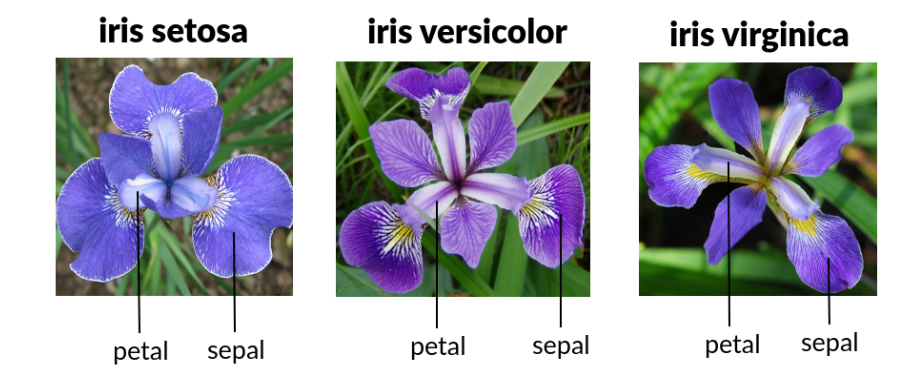

In [9]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Seperate X and Y Feaures

In [11]:
X = df.drop(labels='species', axis=1)
Y = df[['species']]

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Apply label encoding on species column

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['species'] = le.fit_transform(Y['species'])

In [15]:
Y['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [16]:
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Apply Preprocessing Pipeline on X feature

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [18]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [19]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [25]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [26]:
X_pre = pd.DataFrame(X_pre, columns= cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Separate train and test data

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre, Y, test_size= 0.33, random_state= 21 )

In [28]:
xtrain.shape

(100, 4)

In [29]:
xtest.shape

(50, 4)

## Create a logistic regression model

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [31]:
model.intercept_

array([-0.16045841,  1.82152872, -1.66107032])

In [32]:
model.coef_

array([[-0.93375819,  1.24850197, -1.63941954, -1.61201946],
       [ 0.38313791, -0.37212671, -0.40450566, -0.60163442],
       [ 0.55062029, -0.87637526,  2.0439252 ,  2.21365388]])

### Predict training and testing dataset

In [33]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [34]:
ypred_tr[0:5]

array([1, 0, 1, 2, 1])

In [35]:
ypred_ts[0:5]

array([1, 0, 0, 0, 1])

In [36]:
ytrain.head()

,species
52,1
49,0
65,1
118,2
55,1


In [38]:
ytest.head()

,species
92,1
44,0
7,0
21,0
95,1


### Evaluate the model

In [39]:
model.score(xtrain,ytrain)

0.98

In [40]:
model.score(xtest,ytest)

0.94

In [41]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,ypred_tr)
tr_acc

0.98

In [42]:
ts_acc =accuracy_score(ytest,ypred_ts)
ts_acc

0.94

### View the Confusion Matrix for test data

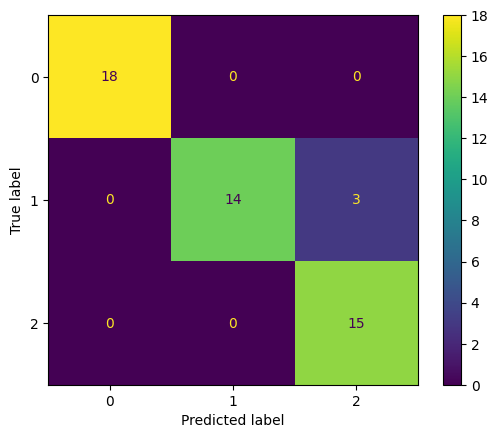

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels= model.classes_)
cfd.plot()

In [44]:
(18+15+14)/50

0.94

## Print Classification Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.82      0.90        17
           2       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



### Getting original species from predictions

In [47]:
model.predict_proba(xtest)

array([[2.06349625e-02, 9.12983142e-01, 6.63818957e-02],
       [9.87155547e-01, 1.28438943e-02, 5.58381230e-07],
       [9.72240034e-01, 2.77594519e-02, 5.13857865e-07],
       [9.85931171e-01, 1.40684351e-02, 3.93678025e-07],
       [8.82040990e-02, 8.60869769e-01, 5.09261315e-02],
       [1.33812491e-02, 8.24362786e-01, 1.62255965e-01],
       [9.41440024e-01, 5.85584236e-02, 1.55292296e-06],
       [2.52403741e-03, 2.09773808e-01, 7.87702154e-01],
       [9.61572403e-01, 3.84258819e-02, 1.71544733e-06],
       [9.91470838e-01, 8.52901569e-03, 1.46703679e-07],
       [2.64080839e-02, 9.47915023e-01, 2.56768935e-02],
       [9.51727098e-02, 8.43219588e-01, 6.16077027e-02],
       [6.93636243e-05, 2.64485214e-02, 9.73482115e-01],
       [8.06124420e-05, 2.11515814e-02, 9.78767806e-01],
       [9.23007969e-01, 7.69854728e-02, 6.55792542e-06],
       [2.52519874e-03, 4.14376549e-01, 5.83098252e-01],
       [7.95663122e-03, 4.24165237e-01, 5.67878131e-01],
       [1.53071523e-02, 8.47207

In [48]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [50]:
ypred_tr_lb

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       've

In [51]:
ypred_ts_lb

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa'], dtype=object)

### Predicting for new data

In [53]:
df_new = df.sample(10)
df_new

,sepal_length,sepal_width,petal_length,petal_width,species
61,5.9,3.0,4.2,1.5,versicolor
144,6.7,3.3,5.7,2.5,virginica
74,6.4,2.9,4.3,1.3,versicolor
58,6.6,2.9,4.6,1.3,versicolor
120,6.9,3.2,5.7,2.3,virginica
65,6.7,3.1,4.4,1.4,versicolor
108,6.7,2.5,5.8,1.8,virginica
111,6.4,2.7,5.3,1.9,virginica
23,5.1,3.3,1.7,0.5,setosa
45,4.8,3.0,1.4,0.3,setosa


In [54]:
Ynew = df_new[['species']]
Ynew

,species
61,versicolor
144,virginica
74,versicolor
58,versicolor
120,virginica
65,versicolor
108,virginica
111,virginica
23,setosa
45,setosa


In [55]:
df_new = df_new.drop(labels='species',axis=1)
df_new

,sepal_length,sepal_width,petal_length,petal_width
61,5.9,3.0,4.2,1.5
144,6.7,3.3,5.7,2.5
74,6.4,2.9,4.3,1.3
58,6.6,2.9,4.6,1.3
120,6.9,3.2,5.7,2.3
65,6.7,3.1,4.4,1.4
108,6.7,2.5,5.8,1.8
111,6.4,2.7,5.3,1.9
23,5.1,3.3,1.7,0.5
45,4.8,3.0,1.4,0.3


In [59]:
df_new.to_csv('sample.csv', index= False)

In [60]:
# read sample csv
df2= pd.read_csv('sample.csv')
df2

,sepal_length,sepal_width,petal_length,petal_width
0,5.9,3.0,4.2,1.5
1,6.7,3.3,5.7,2.5
2,6.4,2.9,4.3,1.3
3,6.6,2.9,4.6,1.3
4,6.9,3.2,5.7,2.3
5,6.7,3.1,4.4,1.4
6,6.7,2.5,5.8,1.8
7,6.4,2.7,5.3,1.9
8,5.1,3.3,1.7,0.5
9,4.8,3.0,1.4,0.3


In [61]:
import numpy as np
def predict_data(df, num_pipe, le, model):
    xnew = num_pipe.transform(df)
    xnew = pd.DataFrame(xnew,columns=num_pipe.get_feature_names_out())
    pred = model.predict(xnew)
    prob = model.predict_proba(xnew)    
    pred_lb = le.inverse_transform(pred)
    return pred_lb,prob

In [62]:
pred, prob = predict_data (df2, num_pipe, le, model)
pred

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [63]:
prob

array([[4.03851288e-02, 8.08256924e-01, 1.51357947e-01],
       [7.57387449e-05, 1.92232074e-02, 9.80701054e-01],
       [1.64394195e-02, 8.72342704e-01, 1.11217876e-01],
       [9.14982494e-03, 8.24629336e-01, 1.66220840e-01],
       [8.73945531e-05, 3.39693100e-02, 9.65943295e-01],
       [1.67610228e-02, 8.34067583e-01, 1.49171394e-01],
       [3.89776567e-05, 8.27248338e-02, 9.17236189e-01],
       [2.85824665e-04, 1.43328462e-01, 8.56385713e-01],
       [9.23007969e-01, 7.69854728e-02, 6.55792542e-06],
       [9.10524657e-01, 8.94721538e-02, 3.18891615e-06]])

In [65]:
Ynew['Predicted'] = pred

In [66]:
Ynew

,species,Predicted
61,versicolor,versicolor
144,virginica,virginica
74,versicolor,versicolor
58,versicolor,versicolor
120,virginica,virginica
65,versicolor,versicolor
108,virginica,virginica
111,virginica,virginica
23,setosa,setosa
45,setosa,setosa
